# Data Science Project - Basketball Players Analysis

# WARNING: REMOVE ANY CODE TO VIEW THE RAW DATA BEFORE TURNING IN

# WARNING: Do not re-run this Jupyter Notebook. The data is confidential and not included in this submission.

## Background and Motivation

- One of the popular sports in the U.S. is basketball. One of the most important days in any sport is game day. Prathusha did an internship with the basketball team and this idea fascinated the others. Because of the interest in basketball and the importance of game day, we are trying to predict the performance on game day based on various factors taken into consideration for our home team.
- There are variety of factors taken into consideration for the analysis and prediction. For example, players’ performance leading up to game day, injuries, and the influence of a player on the overall team performance


## Project Objectives

- Prediction of the performance of individual players as game day arrives is based on various deciding factors like injury, player involvement, and other measures of performance for each practice. Game day is quite stressful, but also an important day to perform well. Without adding more pressure on the team to perform well on game day, our analytics will help the home team to win the match based on their performance on each day.
- We will use the factors injury, duration of each player’s practice, and the performance of each of the players as game day approaches, to do supervised and unsupervised analysis. Various factors will be used in these analyses to get maximum achieved performance on game day.
- Implementing strategic analysis methods will increase the probability of the team winning games in the future as well as reduce injuries.


##  Input data

In [231]:
# imports and setup 

import pandas as pd
import numpy as np
import math
import statsmodels.formula.api as sm

from sklearn.cluster import KMeans, AgglomerativeClustering

from sklearn import tree, svm, metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score, KFold
from sklearn.datasets import load_digits
from sklearn.preprocessing import scale
from sklearn.datasets import fetch_20newsgroups
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

import nltk
from nltk.corpus import stopwords

import re

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)
plt.style.use('ggplot')

In [2]:
analysis_data = pd.read_csv("Prathusha CS Project Data.csv")

In [3]:
game_data = pd.read_csv("Prathusha CS Project GAMELOGS.csv", header=1)

In [4]:
# Here we remove any empty columns
game_data = game_data.dropna(axis=1, how='all')

## Exploring the Data

In [5]:
analysis_data.describe()

,InjuryStatus,InjuryType,ActivityType,rpe,dur,minply,trimp,TPR
count,5666.000000,5666.000000,5665.000000,5554.000000,5681.000000,1295.000000,5593.000000,58.000000
mean,0.207201,0.171550,0.883495,2.331847,94.457281,10.820783,307.903487,50.973099
std,0.650988,0.594065,0.675581,1.998314,67.055216,12.345886,300.389405,30.243924
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.304551
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.737168
50%,0.000000,0.000000,1.000000,3.000000,119.000000,3.000000,300.000000,52.041566
75%,0.000000,0.000000,1.000000,4.000000,150.000000,21.838889,500.000000,76.506879
max,6.000000,6.000000,3.000000,10.000000,214.000000,47.000000,1712.000000,99.917358


There are ~5500 data recorded. There are very few instances of an injury. Most of the data that is recorded is for practices.

In [6]:
analysis_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5700 entries, 0 to 5699
Data columns (total 13 columns):
PlayerID            5700 non-null object
date                5700 non-null object
InjuryStatus        5666 non-null float64
InjuryType          5666 non-null float64
ActivityType        5665 non-null float64
rpe                 5554 non-null float64
dur                 5681 non-null float64
minply              1295 non-null float64
trimp               5593 non-null float64
Location            3781 non-null object
Opponent            895 non-null object
Date_Act_Loc_Opp    5700 non-null object
TPR                 58 non-null float64
dtypes: float64(8), object(5)
memory usage: 579.0+ KB


In [7]:
num_ath = len(analysis_data.PlayerID.unique())
print("There are " + str(num_ath) + " athletes on the Basketball team.")

There are 25 athletes on the Basketball team.


In [8]:
game_data.describe()

,UTAH_POINTS,OPPONENT_POINTS,UTAH_FG,UTAH_FGA,UTAH_FG%,UTAH_3P,UTAH_3PA,UTAH_3P%,UTAH_FT,UTAH_FTA,...,OPPONENT_FT,OPPONENT_FTA,OPPONENT_FT%,OPPONENT_ORB,OPPONENT_TRB,OPPONENT_AST,OPPONENT_STL,OPPONENT_BLK,OPPONENT_TOV,OPPONENT_PF
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,...,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000
mean,76.064516,68.419355,27.161290,56.370968,0.482306,7.887097,21.887097,0.358500,13.854839,19.258065,...,12.387097,17.693548,0.699355,8.080645,30.032258,11.387097,6.225806,3.145161,11.790323,19.370968
std,10.423603,12.144686,4.620672,6.648638,0.060615,3.003303,5.018343,0.105145,5.878125,7.531215,...,4.836185,6.053284,0.107163,3.053074,5.034203,3.939522,2.977618,2.118202,3.383359,4.304911
min,55.000000,37.000000,18.000000,41.000000,0.350000,2.000000,12.000000,0.100000,2.000000,4.000000,...,4.000000,6.000000,0.467000,1.000000,20.000000,2.000000,0.000000,0.000000,5.000000,8.000000
25%,67.000000,60.000000,24.000000,53.250000,0.441000,6.000000,19.000000,0.286000,9.000000,13.000000,...,9.000000,13.000000,0.637750,6.000000,27.000000,9.000000,4.000000,1.250000,10.000000,17.000000
50%,76.500000,68.500000,26.000000,56.000000,0.484500,8.000000,21.500000,0.372500,13.500000,19.000000,...,12.000000,17.500000,0.714000,7.500000,30.000000,11.000000,6.000000,3.000000,12.000000,19.000000
75%,84.750000,78.000000,30.000000,61.000000,0.519000,10.000000,25.500000,0.438000,18.000000,23.750000,...,15.000000,21.750000,0.783000,11.000000,32.750000,14.000000,8.000000,4.750000,14.000000,22.000000
max,96.000000,94.000000,39.000000,71.000000,0.600000,15.000000,36.000000,0.583000,29.000000,36.000000,...,30.000000,36.000000,0.909000,15.000000,44.000000,19.000000,14.000000,10.000000,22.000000,31.000000


In [9]:
game_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 38 columns):
Date               62 non-null object
H/A/N              62 non-null object
Opponent           62 non-null object
W/L                62 non-null object
UTAH_POINTS        62 non-null int64
OPPONENT_POINTS    62 non-null int64
UTAH_FG            62 non-null int64
UTAH_FGA           62 non-null int64
UTAH_FG%           62 non-null float64
UTAH_3P            62 non-null int64
UTAH_3PA           62 non-null int64
UTAH_3P%           62 non-null float64
UTAH_FT            62 non-null int64
UTAH_FTA           62 non-null int64
UTAH_FT%           62 non-null float64
UTAH_ORB           62 non-null int64
UTAH_TRB           62 non-null int64
UTAH_AST           62 non-null int64
UTAH_STL           62 non-null int64
UTAH_BLK           62 non-null int64
UTAH_TOV           62 non-null int64
UTAH_PF            62 non-null int64
OPPONENT_FG        62 non-null int64
OPPONENT_FGA       62 non-null int64

There is 62 records in the game log file that contains records of win/lose of home team and performance to different opponent.

In [10]:
sm.ols(formula="trimp ~ InjuryStatus", data=analysis_data).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  trimp   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.030
Method:                 Least Squares   F-statistic:                     175.6
Date:                Wed, 18 Apr 2018   Prob (F-statistic):           1.72e-39
Time:                        11:02:54   Log-Likelihood:                -39525.
No. Observations:                5559   AIC:                         7.905e+04
Df Residuals:                    5557   BIC:                         7.907e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      324.6200      4.173     77.789      0.000     316.439     332.801
InjuryStatus   -80.4361      6.069    -13.253      0.000     -92.334     -68.538
==============================================================================
Omnibus:                      446.725   Durbin-Watson:                   1.159
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              559.811
Skew:                           0.770   Prob(JB):                    2.74e-122
Kurtosis:                       3.206   Cond. No.                         1.64
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Injuries on their own do not effect the performance of an athlete.

## Data Visualization

### Data Exploration Of Practices VS Game VS Off Days

In [11]:
#Group the data by date and Activity Type, find the size of each ActivityType in each day
date_activity = analysis_data.groupby(['date','ActivityType']).size()
#make a datframe for grouped data
activity_frame = pd.DataFrame(date_activity.reset_index())
activity_frame.columns = ['date','ActivityType','sum']
#Convert date into date format and sort it
activity_frame['date'] = pd.to_datetime(activity_frame.date)
activity_frame.sort_values(['date']).reset_index(drop= True)

,date,ActivityType,sum
0,2016-10-01,0.0,1
1,2016-10-01,1.0,14
2,2016-10-02,0.0,15
3,2016-10-03,1.0,16
4,2016-10-04,1.0,16
5,2016-10-05,0.0,16
6,2016-10-06,1.0,16
7,2016-10-07,1.0,16
8,2016-10-08,1.0,16
9,2016-10-09,0.0,16


In [12]:
#Due to the large number of data, we group the date by month.
activity_frame['year'] = [y.year for y in activity_frame['date']]
activity_frame['month'] = [m.month for m in activity_frame['date']]

In [13]:
#Group off days data by year and month
off = activity_frame.loc[activity_frame['ActivityType'] == 0.0]
off.sort_values(['date']).reset_index(drop=True)
off = off.groupby(['year','month'])['sum'].sum().reset_index(drop=True)
off = pd.DataFrame(off)

#Group practice days data by year and month
practice = activity_frame.loc[activity_frame['ActivityType'] == 1.0]
practice.sort_values(['date']).reset_index(drop=True)
practice = practice.groupby(['year','month'])['sum'].sum().reset_index(drop=True)
practice = pd.DataFrame(practice)

#Group game days data by year and month
game = activity_frame.loc[activity_frame['ActivityType'] == 2.0]
game.sort_values(['date']).reset_index(drop=True)
game = game.groupby(['year','month'])['sum'].sum().reset_index(drop=True)
game = pd.DataFrame(game)

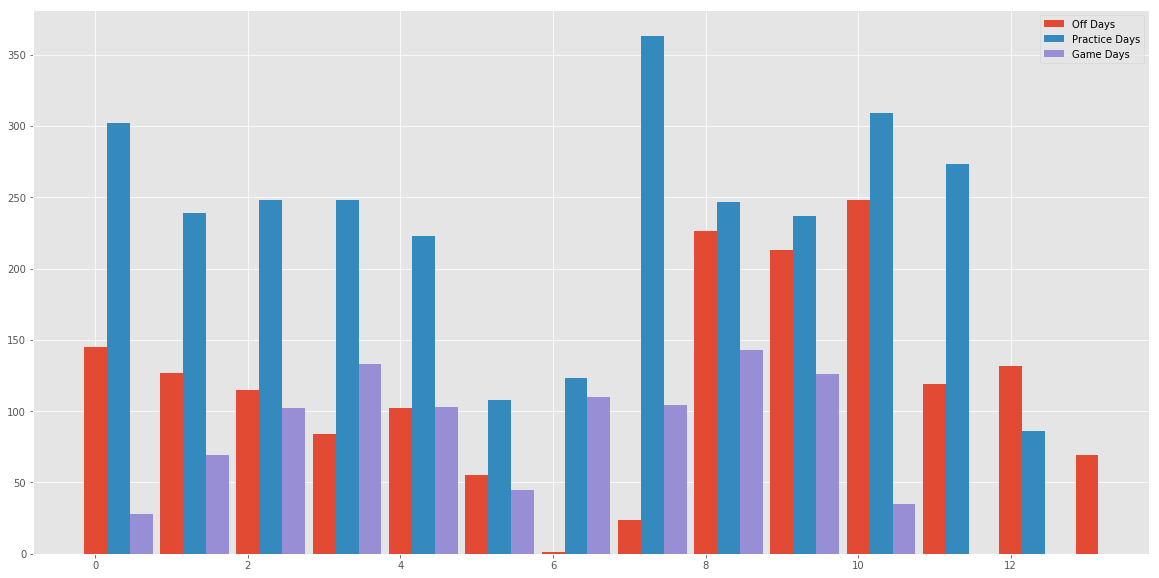

In [14]:
#Make bar plot for each type of activity
plt.figure(figsize=(20,10))
plt.bar(off.index, off['sum'], width = 0.3,label='Off Days')
plt.bar(practice.index + 0.3, practice['sum'],  width = 0.3,label='Practice Days')
plt.bar(game.index + 0.6, game['sum'],  width = 0.3,label='Game Days')
plt.legend()

### Visualization of individual players data

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x118b62b38>,
      dtype=object)

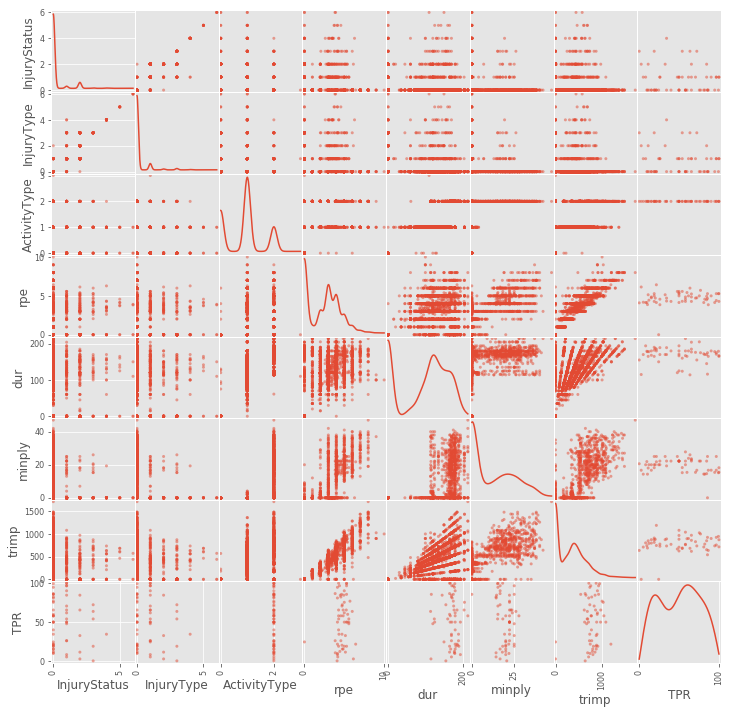

In [15]:
pd.plotting.scatter_matrix(analysis_data, figsize=(12, 12), diagonal='kde')

Here we can see that as an injury stays over time and as the injury type gets more serious, the performance (measured by trimp) of the players goes down. However, when there are no injuries, the performance of a player varies and cannot be easily predicted with simply injury data.

### Influence of injury on team performance

In [16]:
team_data = analysis_data[analysis_data.iloc[:, 0] == "TEAM"]

In [17]:
player_data = analysis_data[analysis_data.iloc[:, 0] != "TEAM"]

Text(0,0.5,'Trimp')

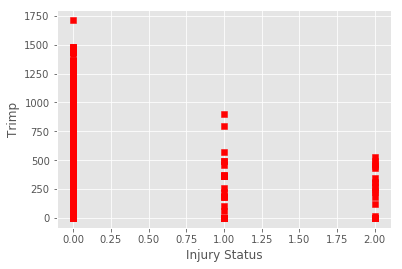

In [18]:
plt.scatter(x=player_data['InjuryStatus'],y=player_data['trimp'],c='r',marker='s')

plt.xlabel('Injury Status')
plt.ylabel('Trimp')

We still show potential for better performance when there are no injuries and decreasing performance as time with the injury continues.

Note: We do not have access to the units for any of these variables.

Text(0,0.5,'Trimp')

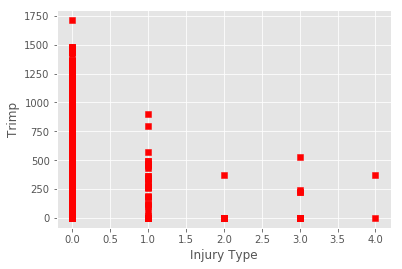

In [19]:
plt.scatter(x=player_data['InjuryType'],y=player_data['trimp'],c='r',marker='s')

plt.xlabel('Injury Type')
plt.ylabel('Trimp')

The intensity of the injury type also decreases the performance of each player.

Text(0,0.5,'Trimp')

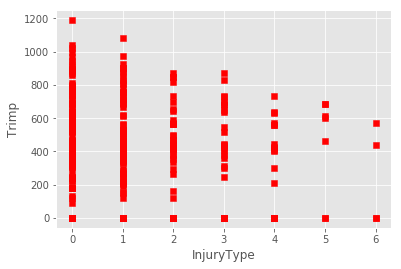

In [20]:
plt.scatter(x=team_data['InjuryType'],y=team_data['trimp'],c='r',marker='s')

plt.xlabel('InjuryType')
plt.ylabel('Trimp')

The intensity of the injury type also decreases the performance of the team.

#### Influence of Injury status on the team overall performance

From the graph above, it is clear that when there is no injury, then the team performance improves.

### Prediction of performance on game day

In [21]:
team_game_data = team_data[team_data.loc[:, "ActivityType"] == 2]

In [22]:
team_game_data.corr()

,InjuryStatus,InjuryType,ActivityType,rpe,dur,minply,trimp,TPR
InjuryStatus,1.000000,0.986437,NaN,0.099876,-0.264160,-0.088512,-0.154925,-0.084130
InjuryType,0.986437,1.000000,NaN,0.007485,-0.292507,-0.098747,-0.233655,-0.108769
ActivityType,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rpe,0.099876,0.007485,NaN,1.000000,-0.115627,0.187698,0.535579,0.145926
dur,-0.264160,-0.292507,NaN,-0.115627,1.000000,0.192339,0.602358,-0.040042
minply,-0.088512,-0.098747,NaN,0.187698,0.192339,1.000000,0.259664,-0.191937
trimp,-0.154925,-0.233655,NaN,0.535579,0.602358,0.259664,1.000000,0.186496
TPR,-0.084130,-0.108769,NaN,0.145926,-0.040042,-0.191937,0.186496,1.000000


In [23]:
sm.ols(formula="trimp ~ rpe + dur", data=team_game_data).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  trimp   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.725
Method:                 Least Squares   F-statistic:                     84.20
Date:                Wed, 18 Apr 2018   Prob (F-statistic):           2.84e-18
Time:                        11:03:02   Log-Likelihood:                -383.04
No. Observations:                  64   AIC:                             772.1
Df Residuals:                      61   BIC:                             778.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -895.5821    130.285     -6.874      0.000   -1156.104    -635.060
rpe          138.9142     15.052      9.229      0.000     108.815     169.013
dur            6.0282      0.595     10.129      0.000       4.838       7.218
==============================================================================
Omnibus:                      108.851   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2965.795
Skew:                          -5.328   Prob(JB):                         0.00
Kurtosis:                      34.601   Cond. No.                     1.81e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.81e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

We get that rpe and duration are good estimations of performance on game day. It makes sense that rpe is a good predictor because that is how well the players think they performed.

We do not get a model that promises accurate prediction for every game day, but we can predict 73% of the games correctly with this model.

#### Relation between performace of each player and exertion rate

Text(0,0.5,'Trimp')

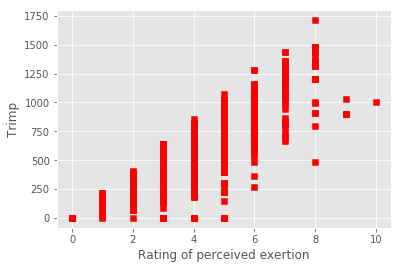

In [24]:
plt.scatter(x=player_data['rpe'],y=player_data['trimp'],c='r',marker='s')

plt.xlabel('Rating of perceived exertion')
plt.ylabel('Trimp')

From the plot above, it is clear that the rate of exertion is from 8 to 10, which is from hard to very hard exertion. This rate of exertion has more influence on performance of each player than extremely hard (9) and maximum (10) exertion rates.

In [25]:
game_data['Date']

0     11/12/2016
1     11/15/2016
2     11/18/2016
3     11/25/2016
4     11/28/2016
5      12/1/2016
6      12/6/2016
7     12/10/2016
8     12/17/2016
9     12/22/2016
10    12/23/2016
11    12/25/2016
12      1/1/2017
13      1/5/2017
14      1/7/2017
15     1/12/2017
16     1/14/2017
17     1/18/2017
18     1/21/2017
19     1/26/2017
20     1/28/2017
21      2/2/2017
22      2/4/2017
23      2/9/2017
24     2/11/2017
25     2/16/2017
26     2/19/2017
27     2/23/2017
28      3/2/2017
29      3/4/2017
         ...    
32    11/10/2017
33    11/13/2017
34    11/16/2017
35    11/21/2017
36    11/23/2017
37    11/24/2017
38     12/2/2017
39     12/5/2017
40     12/9/2017
41    12/16/2017
42    12/20/2017
43    12/29/2017
44    12/31/2017
45      1/4/2018
46      1/7/2018
47     1/11/2018
48     1/14/2018
49     1/18/2018
50     1/21/2018
51     1/25/2018
52     1/27/2018
53      2/2/2018
54      2/8/2018
55     2/10/2018
56     2/15/2018
57     2/17/2018
58     2/22/2018
59     2/24/20

#### Influence of activity type on performance of the team

Text(0,0.5,'Trimp')

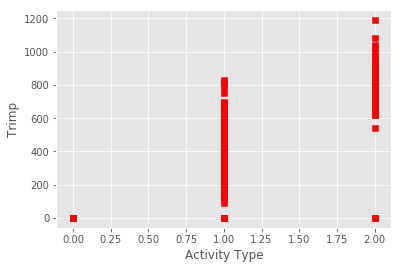

In [26]:
plt.scatter(x=team_data['ActivityType'],y=team_data['trimp'],c='r',marker='s')

plt.xlabel('Activity Type')
plt.ylabel('Trimp')

Performance of the team on the game day is better than on the practice days.

#### Infuence of rating of perceived exertion on the performance on team on the game day

Text(0,0.5,'TPR')

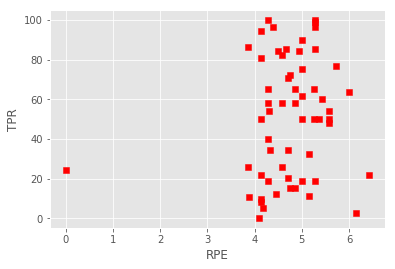

In [27]:
plt.scatter(x=team_data['rpe'],y=team_data['TPR'],c='r',marker='s')

plt.xlabel('RPE')
plt.ylabel('TPR')

From the plot above, it is clear that the rate of exertion is scattered from 3 (moderate practice) to 5 (hard practice). These rates of exertion have more influence on performance of team than very hard (7) and maximum (10) exertion rates. Since the team consists of all of the players, we use the overall practice exertion rather than using data from individual players.

In [28]:
sm.ols(formula="trimp ~ ActivityType + InjuryStatus + InjuryType + rpe + dur ", data=team_data).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  trimp   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     482.7
Date:                Wed, 18 Apr 2018   Prob (F-statistic):          2.67e-148
Time:                        11:03:02   Log-Likelihood:                -2008.9
No. Observations:                 332   AIC:                             4030.
Df Residuals:                     326   BIC:                             4053.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -64.1808     12.293     -5.221      0.000     -88.364     -39.998
ActivityType    50.1970     20.166      2.489      0.013      10.525      89.869
InjuryStatus   104.3393     24.741      4.217      0.000      55.667     153.011
InjuryType    -102.6354     24.758     -4.145      0.000    -151.342     -53.929
rpe             72.0322      7.417      9.712      0.000      57.442      86.623
dur              1.9320      0.223      8.660      0.000       1.493       2.371
==============================================================================
Omnibus:                      118.516   Durbin-Watson:                   2.108
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              852.306
Skew:                          -1.284   Prob(JB):                    8.39e-186
Kurtosis:                      10.417   Cond. No.                         745.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

From the model, it is clear that the InjuryStatus has more influence on the team performance on game day.

In [29]:
team_data["date"] = pd.to_datetime(team_data["date"])

/Users/apple/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


### Visualization of Game log data:

In [30]:
game_data.dtypes

Date                object
H/A/N               object
Opponent            object
W/L                 object
UTAH_POINTS          int64
OPPONENT_POINTS      int64
UTAH_FG              int64
UTAH_FGA             int64
UTAH_FG%           float64
UTAH_3P              int64
UTAH_3PA             int64
UTAH_3P%           float64
UTAH_FT              int64
UTAH_FTA             int64
UTAH_FT%           float64
UTAH_ORB             int64
UTAH_TRB             int64
UTAH_AST             int64
UTAH_STL             int64
UTAH_BLK             int64
UTAH_TOV             int64
UTAH_PF              int64
OPPONENT_FG          int64
OPPONENT_FGA         int64
OPPONENT_FG%       float64
OPPONENT_3P          int64
OPPONENT_3PA         int64
OPPONENT_3P%       float64
OPPONENT_FT          int64
OPPONENT_FTA         int64
OPPONENT_FT%       float64
OPPONENT_ORB         int64
OPPONENT_TRB         int64
OPPONENT_AST         int64
OPPONENT_STL         int64
OPPONENT_BLK         int64
OPPONENT_TOV         int64
O

In [31]:
game_data["Date"] = pd.to_datetime(game_data["Date"])

In [32]:
game_data.corr()

,UTAH_POINTS,OPPONENT_POINTS,UTAH_FG,UTAH_FGA,UTAH_FG%,UTAH_3P,UTAH_3PA,UTAH_3P%,UTAH_FT,UTAH_FTA,...,OPPONENT_FT,OPPONENT_FTA,OPPONENT_FT%,OPPONENT_ORB,OPPONENT_TRB,OPPONENT_AST,OPPONENT_STL,OPPONENT_BLK,OPPONENT_TOV,OPPONENT_PF
UTAH_POINTS,1.000000,-0.087370,0.778880,0.387588,0.667541,0.418644,0.103248,0.520005,0.334867,0.361056,...,-0.007983,0.100347,-0.210460,0.146130,-0.161555,-0.102818,-0.049598,-0.068739,0.056171,0.258844
OPPONENT_POINTS,-0.087370,1.000000,-0.043876,0.042707,-0.083977,-0.073739,-0.108686,-0.004878,-0.048276,-0.091895,...,0.320684,0.213398,0.313428,0.115794,0.223936,0.683548,0.187284,0.153724,-0.171375,-0.054762
UTAH_FG,0.778880,-0.043876,1.000000,0.662378,0.695290,0.139548,-0.133527,0.358076,-0.262280,-0.183526,...,-0.170102,-0.063261,-0.228920,0.008359,-0.157386,0.021730,-0.084904,0.027717,-0.120489,-0.228872
UTAH_FGA,0.387588,0.042707,0.662378,1.000000,-0.071636,0.045644,0.139341,-0.052048,-0.377379,-0.348000,...,-0.239066,-0.153544,-0.178759,-0.038648,0.225428,0.095821,-0.015894,0.304586,-0.097784,-0.383482
UTAH_FG%,0.667541,-0.083977,0.695290,-0.071636,1.000000,0.140585,-0.309231,0.515715,0.018807,0.100914,...,0.038791,0.087473,-0.091642,0.045485,-0.417517,-0.055632,-0.095942,-0.237966,-0.039330,0.077522
UTAH_3P,0.418644,-0.073739,0.139548,0.045644,0.140585,1.000000,0.721376,0.733674,0.012057,-0.038554,...,-0.033059,-0.042513,0.003896,0.353218,0.167223,-0.026728,0.039561,-0.036036,0.008925,-0.075321
UTAH_3PA,0.103248,-0.108686,-0.133527,0.139341,-0.309231,0.721376,1.000000,0.077625,0.024444,-0.086835,...,-0.060989,-0.137691,0.167948,0.375094,0.379754,-0.084821,0.135579,-0.111014,0.098997,-0.105784
UTAH_3P%,0.520005,-0.004878,0.358076,-0.052048,0.515715,0.733674,0.077625,1.000000,-0.015689,0.021199,...,0.019762,0.092892,-0.172847,0.164310,-0.114189,0.000435,-0.104776,0.058407,-0.126151,-0.002083
UTAH_FT,0.334867,-0.048276,-0.262280,-0.377379,0.018807,0.012057,0.024444,-0.015689,1.000000,0.948485,...,0.270161,0.299121,-0.015298,0.065519,-0.124487,-0.202832,0.025319,-0.147059,0.284475,0.857311
UTAH_FTA,0.361056,-0.091895,-0.183526,-0.348000,0.100914,-0.038554,-0.086835,0.021199,0.948485,1.000000,...,0.238012,0.307060,-0.088433,0.008349,-0.174043,-0.233278,0.042683,-0.100012,0.223476,0.881868


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11c795860>,
        ...,
        ...,
        ...,
       ...,
        ...,
        ...,
        ...,
      dtype=object)

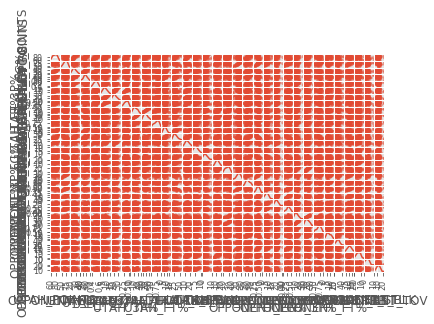

In [33]:
pd.plotting.scatter_matrix(game_data.iloc[:, 4:37], diagonal='kde')

Text(0,0.5,'Opponent')

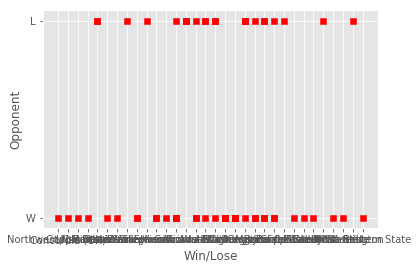

In [34]:
plt.scatter(x=game_data.loc[:,'Opponent'],y=game_data.loc[:,'W/L'],c='r',marker='s')

plt.xlabel('Win/Lose')
plt.ylabel('Opponent')

We won most of our games. We won both times against half of the other universities and lost both times against a few of the universities. There were also a few universities where we won once and lost the other time.

### Combining the dataframes to get overall performance and influence on various factors

In [35]:
# Here we have to rename the date column so that we can merge it with the Date column in the other dataframe
analysis_data.rename(index=str, columns={"date": "Date"}, inplace=True)

# We need to change the "Date" column in game_data back to an object type to merge them
org_game_data = pd.read_csv("Prathusha CS Project GAMELOGS.csv", header=1)

analysis_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5700 entries, 0 to 5699
Data columns (total 13 columns):
PlayerID            5700 non-null object
Date                5700 non-null object
InjuryStatus        5666 non-null float64
InjuryType          5666 non-null float64
ActivityType        5665 non-null float64
rpe                 5554 non-null float64
dur                 5681 non-null float64
minply              1295 non-null float64
trimp               5593 non-null float64
Location            3781 non-null object
Opponent            895 non-null object
Date_Act_Loc_Opp    5700 non-null object
TPR                 58 non-null float64
dtypes: float64(8), object(5)
memory usage: 623.4+ KB


In [36]:
Complete_data = org_game_data[['Date', 'H/A/N','Opponent','W/L','UTAH_POINTS','OPPONENT_POINTS']].merge(analysis_data[['Date','PlayerID','InjuryStatus','ActivityType','rpe','dur','trimp','TPR']], on='Date', how='outer')

In [37]:
Complete_data.describe()

,UTAH_POINTS,OPPONENT_POINTS,InjuryStatus,ActivityType,rpe,dur,trimp,TPR
count,1040.000000,1040.000000,5666.000000,5665.000000,5554.000000,5681.000000,5593.000000,58.000000
mean,75.875000,68.382692,0.207201,0.883495,2.331847,94.457281,307.903487,50.973099
std,10.256468,12.048973,0.650988,0.675581,1.998314,67.055216,300.389405,30.243924
min,55.000000,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.304551
25%,67.000000,60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.737168
50%,77.000000,68.000000,0.000000,1.000000,3.000000,119.000000,300.000000,52.041566
75%,84.000000,78.000000,0.000000,1.000000,4.000000,150.000000,500.000000,76.506879
max,96.000000,94.000000,6.000000,3.000000,10.000000,214.000000,1712.000000,99.917358


In [38]:
Complete_data.dtypes

Date                object
H/A/N               object
Opponent            object
W/L                 object
UTAH_POINTS        float64
OPPONENT_POINTS    float64
PlayerID            object
InjuryStatus       float64
ActivityType       float64
rpe                float64
dur                float64
trimp              float64
TPR                float64
dtype: object

In [39]:
Complete_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5701 entries, 0 to 5700
Data columns (total 13 columns):
Date               5701 non-null object
H/A/N              1040 non-null object
Opponent           1040 non-null object
W/L                1040 non-null object
UTAH_POINTS        1040 non-null float64
OPPONENT_POINTS    1040 non-null float64
PlayerID           5700 non-null object
InjuryStatus       5666 non-null float64
ActivityType       5665 non-null float64
rpe                5554 non-null float64
dur                5681 non-null float64
trimp              5593 non-null float64
TPR                58 non-null float64
dtypes: float64(8), object(5)
memory usage: 623.5+ KB


#### Getting team data from complete dataframe

In [40]:
Complete_team_data = Complete_data[Complete_data.iloc[:, 6] == "TEAM"]

#### Factors influencing the team overall performance

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12ac9f470>,
      dtype=object)

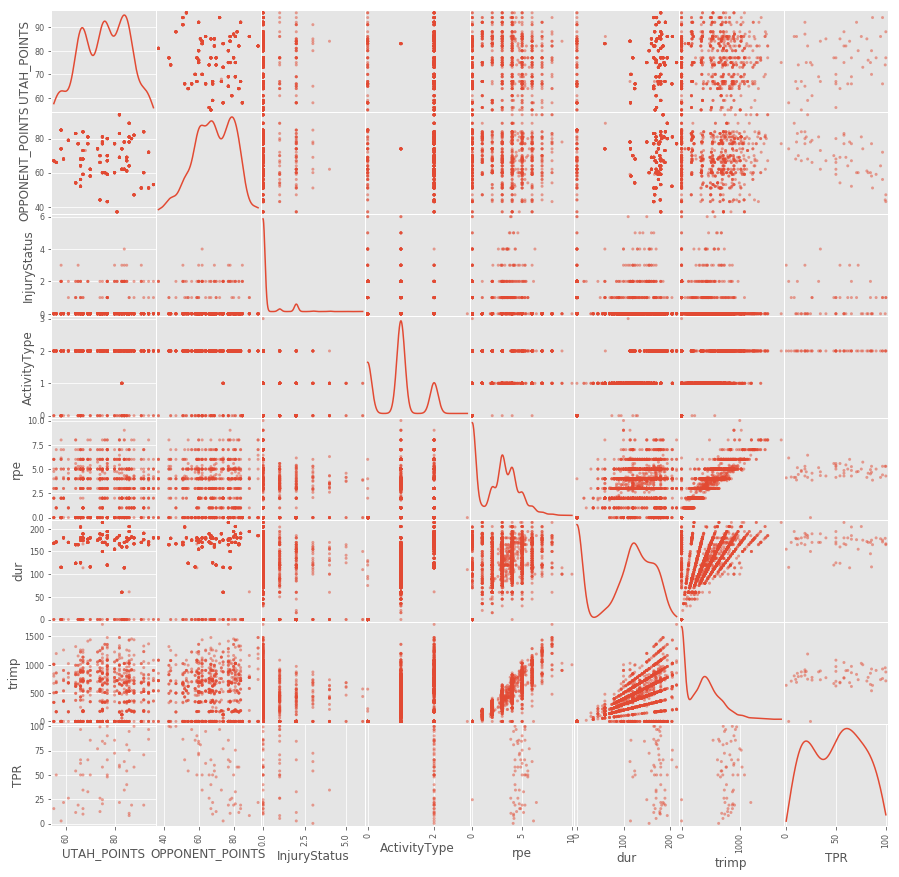

In [41]:
pd.plotting.scatter_matrix(Complete_data, figsize=(15, 15), diagonal='kde')

In [42]:
Complete_data.corr()

,UTAH_POINTS,OPPONENT_POINTS,InjuryStatus,ActivityType,rpe,dur,trimp,TPR
UTAH_POINTS,1.000000,-0.089442,0.026904,0.075537,0.062948,0.128532,0.080504,0.320676
OPPONENT_POINTS,-0.089442,1.000000,-0.043230,-0.009539,-0.076008,0.031291,-0.048474,-0.620750
InjuryStatus,0.026904,-0.043230,1.000000,-0.218738,-0.196573,-0.232251,-0.175037,-0.084130
ActivityType,0.075537,-0.009539,-0.218738,1.000000,0.638329,0.896628,0.633204,NaN
rpe,0.062948,-0.076008,-0.196573,0.638329,1.000000,0.723835,0.938881,0.145926
dur,0.128532,0.031291,-0.232251,0.896628,0.723835,1.000000,0.746562,-0.040042
trimp,0.080504,-0.048474,-0.175037,0.633204,0.938881,0.746562,1.000000,0.186496
TPR,0.320676,-0.620750,-0.084130,NaN,0.145926,-0.040042,0.186496,1.000000


In [43]:
sm.ols(formula="trimp ~ rpe + dur ", data=Complete_team_data).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  trimp   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     1130.
Date:                Wed, 18 Apr 2018   Prob (F-statistic):          4.38e-148
Time:                        11:03:41   Log-Likelihood:                -2019.8
No. Observations:                 332   AIC:                             4046.
Df Residuals:                     329   BIC:                             4057.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -63.9644     11.136     -5.744      0.000     -85.871     -42.058
rpe           81.6595      6.968     11.719      0.000      67.951      95.368
dur            2.1441      0.197     10.873      0.000       1.756       2.532
==============================================================================
Omnibus:                      113.837   Durbin-Watson:                   1.301
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              764.141
Skew:                          -1.246   Prob(JB):                    1.17e-166
Kurtosis:                      10.002   Cond. No.                         232.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0,0.5,'TPR')

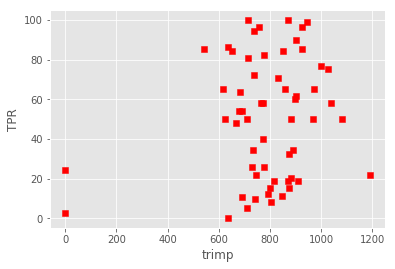

In [44]:
plt.scatter(x=Complete_team_data.loc[:,'trimp'],y=Complete_team_data.loc[:,'TPR'],c='r',marker='s')

plt.xlabel('trimp')
plt.ylabel('TPR')

Trimp is the training impulse. Thus from the graph above, it is obvious that when the trimp is distributed between 700 to 1000.  The overall team performance on game day is higher than practice days or off days. Hence, it influences performance more.

## Analysis of Performance

/Users/apple/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:29: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims)
/Users/apple/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)
/Users/apple/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:780: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/apple/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:781: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


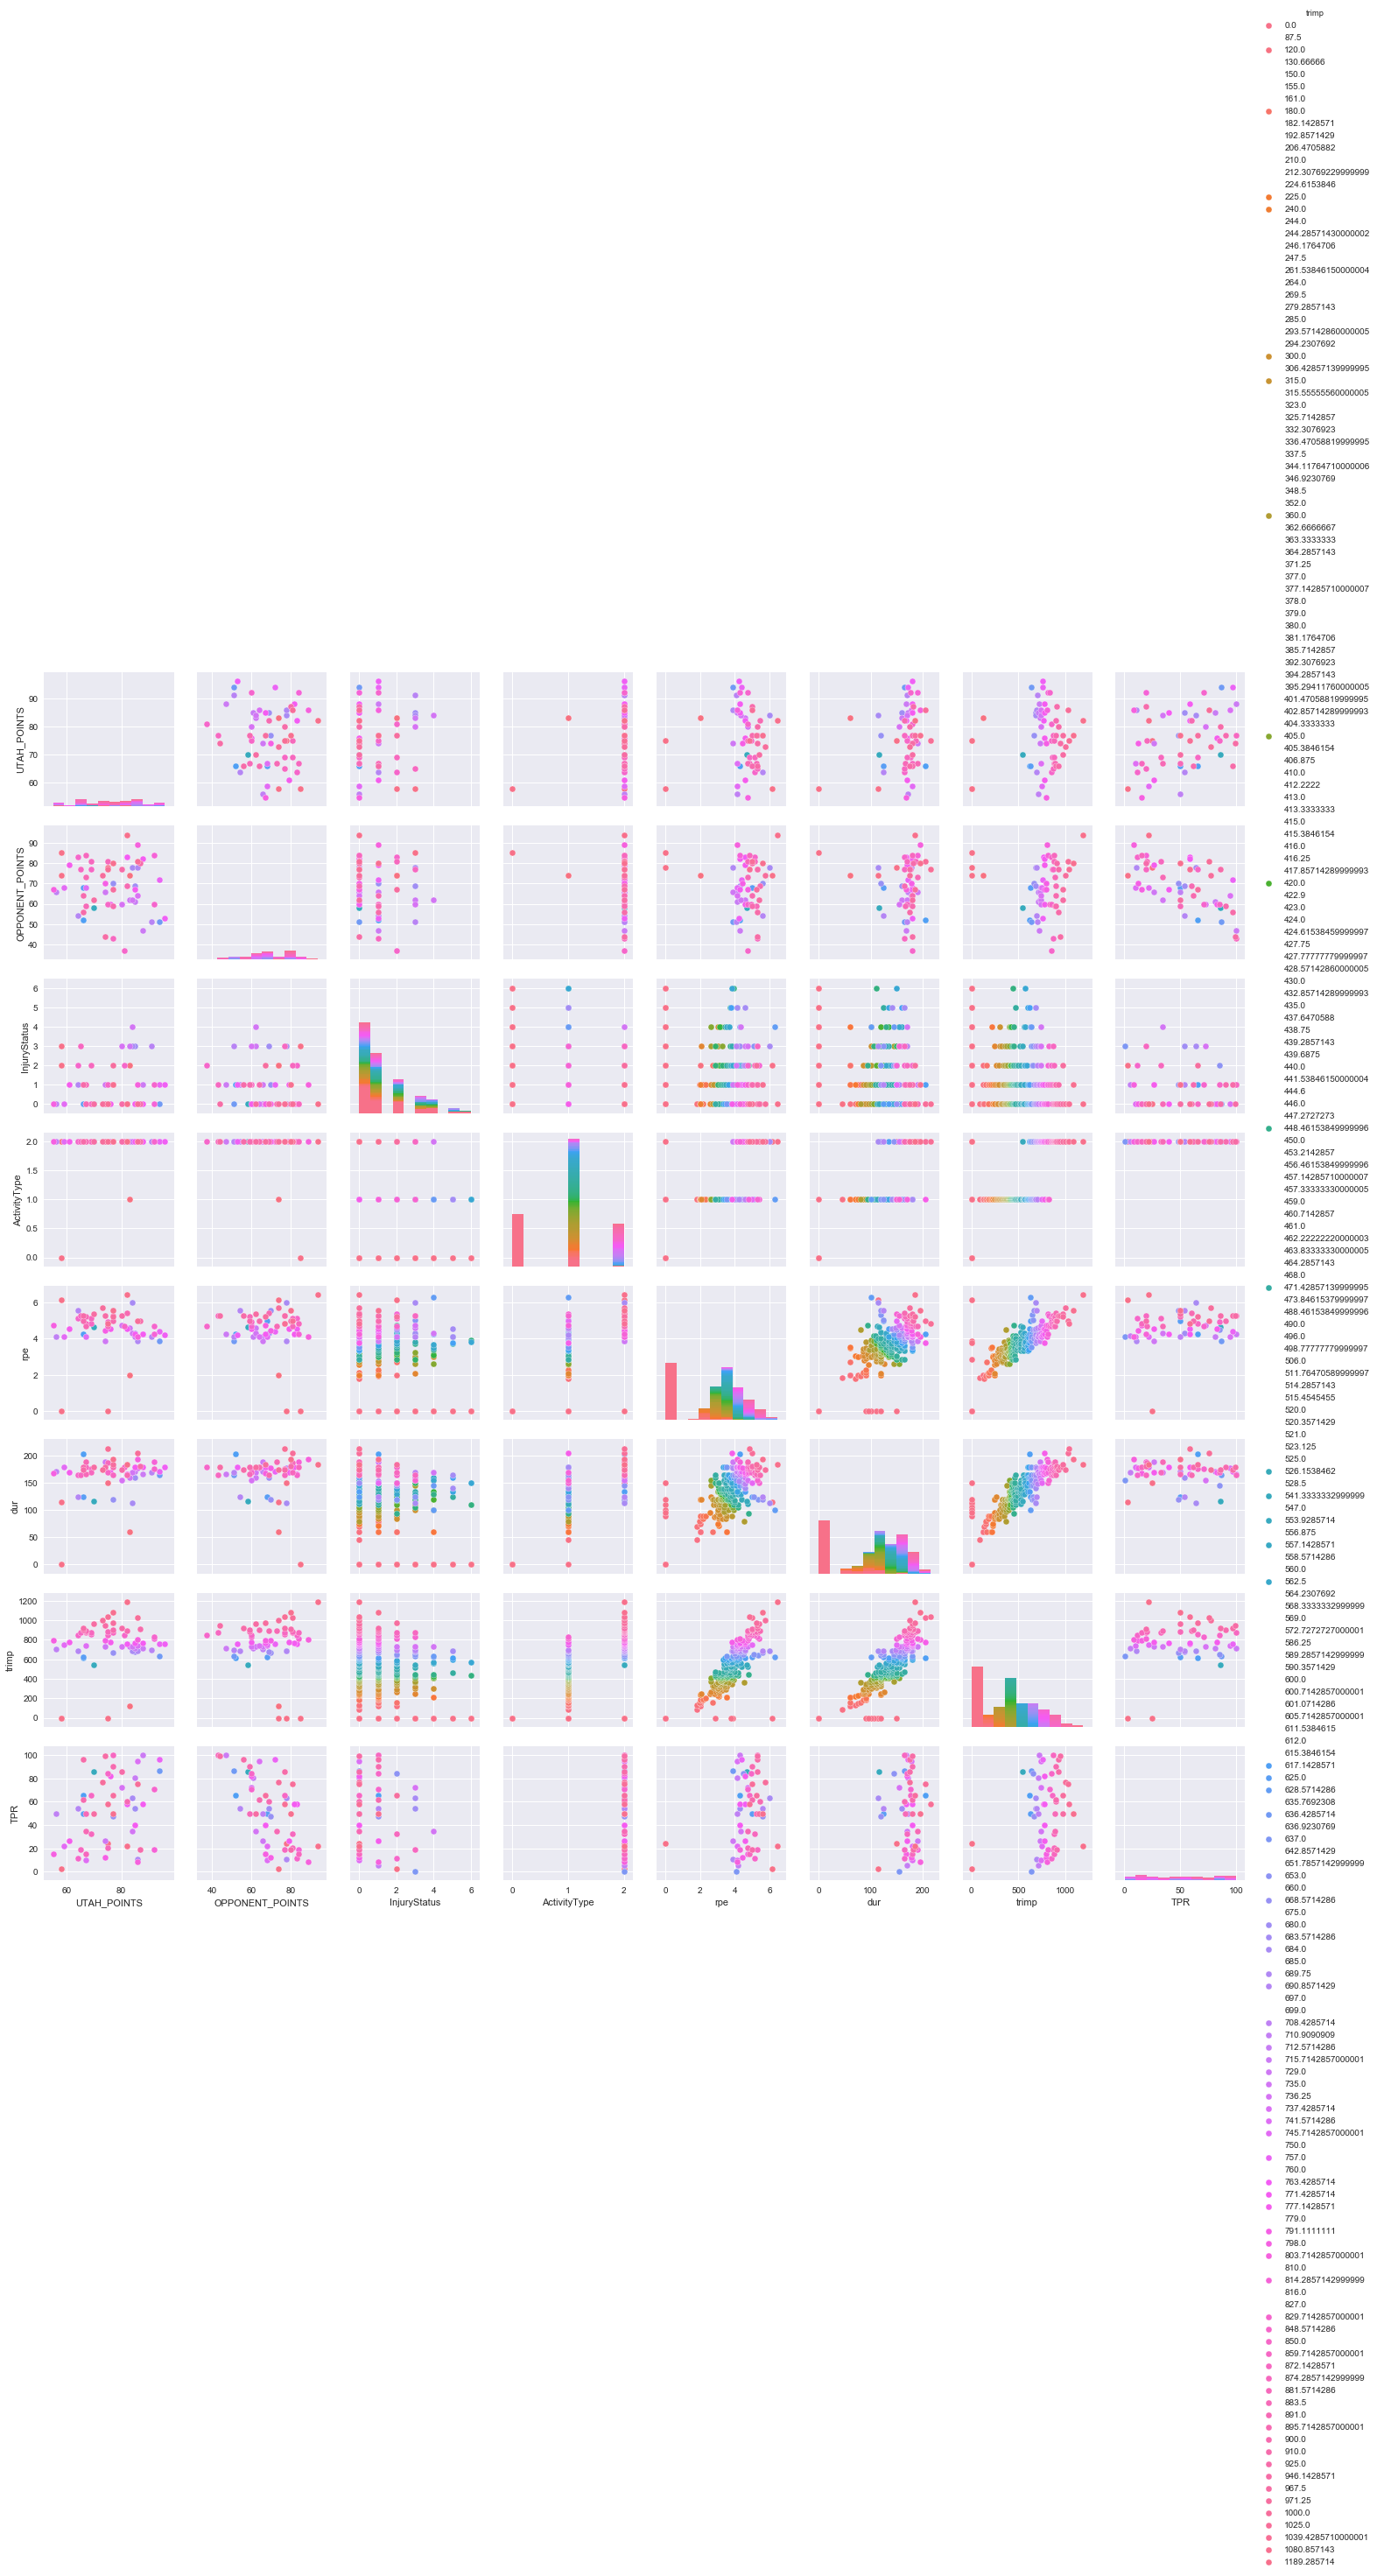

In [45]:
import seaborn as sns
sns.set()

df = Complete_team_data 
sns.pairplot(df, hue="trimp");

In [46]:
import numpy as np

from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn import metrics
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)
plt.style.use('ggplot')
# Create color maps
from matplotlib.colors import ListedColormap
cmap = ListedColormap(["#e41a1c","#984ea3","#a65628","#377eb8","#ffff33","#4daf4a","#ff7f00"])


In [47]:
Complete_team_data.dtypes

Date                object
H/A/N               object
Opponent            object
W/L                 object
UTAH_POINTS        float64
OPPONENT_POINTS    float64
PlayerID            object
InjuryStatus       float64
ActivityType       float64
rpe                float64
dur                float64
trimp              float64
TPR                float64
dtype: object

In [48]:
X = Complete_team_data.loc[:,"H/A/N","W/L","UTAH_POINTS","OPPONENT_POINTS",'InjuryStatus','ActivityType','rpe','dur','TPR']
#y = Complete_team_data["trimp"]


IndexingError: Too many indexers

In [49]:
agg_cluster_model = AgglomerativeClustering(linkage="ward", affinity='euclidean', n_clusters=3)
y_pred = agg_cluster_model.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_pred,  marker="o", cmap=cmap);

NameError: name 'X' is not defined

In [50]:
sm.ols(formula="trimp ~ H/A/N", data=Complete_team_data).fit().summary()

PatsyError: Error evaluating factor: NameError: name 'A' is not defined
    trimp ~ H/A/N
              ^

R squared value is quite low & not as expected. 

In [ ]:
sm.ols(formula="trimp ~ W/L+rpe+dur", data=Complete_team_data).fit().summary()

Team performance rating (TPR) is more influenced by the opponents.

## Dendogram

In [51]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from matplotlib.colors import ListedColormap
# Create color maps
cmap = ListedColormap(["Red","Green","Blue"])

# --End of synced data--

## PCA

In [52]:
from sklearn.decomposition import PCA 

Complete_team_data.dropna(axis=0)
# PCA analysis 
pca_model = PCA()
player_PCA = pca_model.fit_transform(Complete_team_data)

plt.scatter(player_PCA[:, 0], player_PCA[:, 1], c=Complete_data.loc['trimp'], cmap=cmap_bold,s=30)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

ValueError: could not convert string to float: 'TEAM'

In [ ]:
#Fix 1: Add names for categorical variables. (NOT DONE YET)

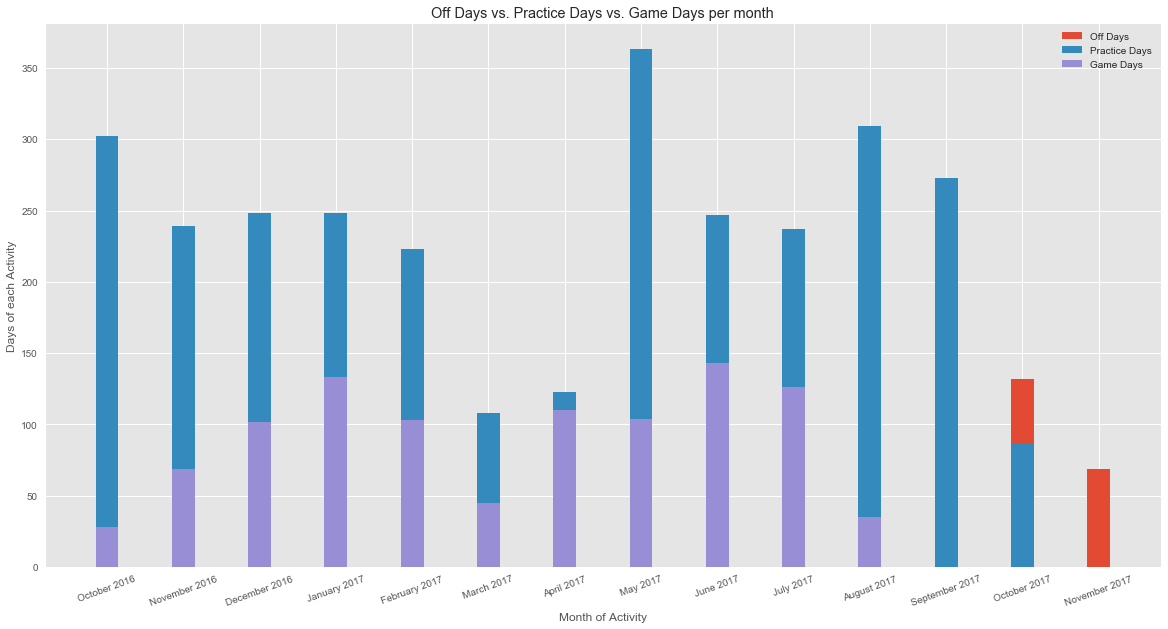

In [53]:
#Fix 2: To be fixed
import calendar
#Make bar plot for each type of activity
plt.figure(figsize=(20,10))
plt.title("Off Days vs. Practice Days vs. Game Days per month")
plt.bar(off.index, off['sum'], width = 0.3,label='Off Days')
plt.bar(practice.index, practice['sum'],  width = 0.3,label='Practice Days')
plt.bar(game.index, game['sum'],  width = 0.3,label='Game Days')
plt.xticks(np.arange(14), ("October 2016", "November 2016", "December 2016", "January 2017", "February 2017", "March 2017", "April 2017", "May 2017", "June 2017", "July 2017", "August 2017", "September 2017", "October 2017", "November 2017"), rotation=20)
plt.xlabel('Month of Activity')
plt.ylabel('Days of each Activity')
#plt.text("This graph shows the number of days with respect to each activity for each month. It covers two seasons of data as well as data for off-season days.")
plt.legend()

Figure 1: This graph shows the number of days with respect to each activity for each month. It covers two seasons of data as well as data for off-season days.

In [54]:
#Fix 3: add titles, legends, and captions to each image.

Text(0,0.5,'Trimp')

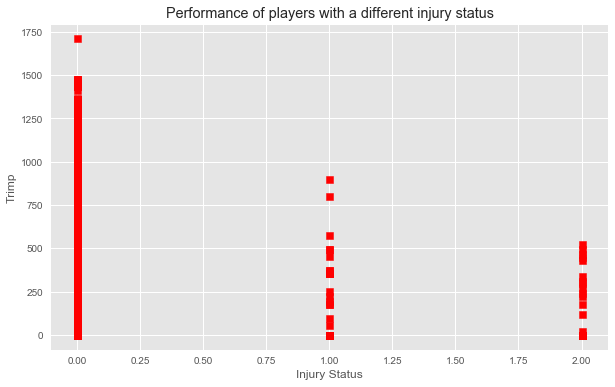

In [55]:
# Figure 1 done above
# Caption could be better

# Figure 2
plt.scatter(x=player_data['InjuryStatus'],y=player_data['trimp'],c='r',marker='s')
plt.title("Performance of players with a different injury status")
plt.xlabel('Injury Status')
plt.ylabel('Trimp')

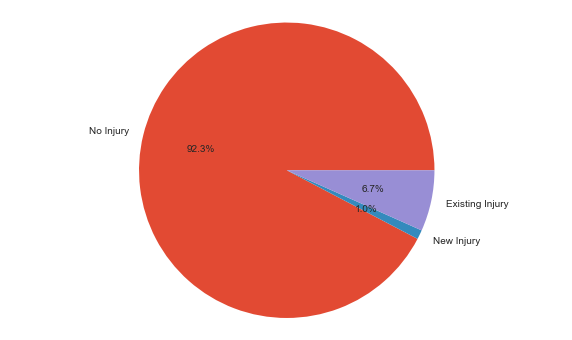

In [56]:
#Fix 5: Part B

# Pie plot for injury status
injury_status = player_data.groupby("InjuryStatus").apply(lambda players: len(players))
#injury_status
plt.pie(injury_status, explode = (0,0,0), labels = ["No Injury", "New Injury", "Existing Injury"], autopct='%1.1f%%')
plt.axis('equal')
plt.show()

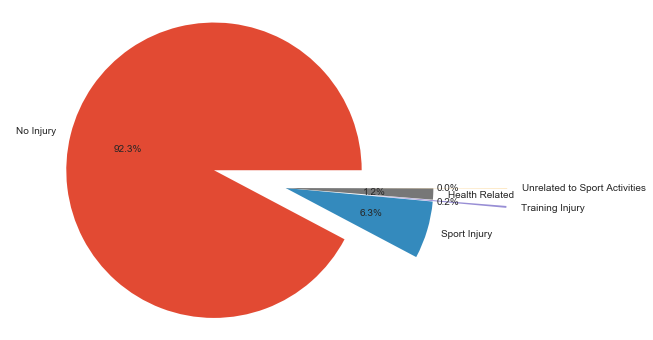

In [57]:
# Pie plot for injury type
injury_type = player_data.groupby("InjuryType").apply(lambda players: len(players))
#injury_type
plt.pie(injury_type, explode = (0.5,0,0.5,0,0.5), labels = ["No Injury", "Sport Injury", "Training Injury", "Health Related", "Unrelated to Sport Activities"], autopct='%1.1f%%')
plt.axis('equal')
plt.show()

Text(0,0.5,'Win/Lose')

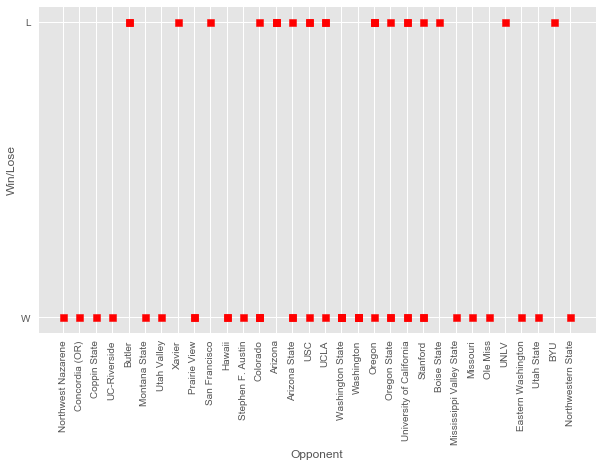

In [58]:
# Fix 7
plt.scatter(x=game_data.loc[:,'Opponent'],y=game_data.loc[:,'W/L'],c='r',marker='s')
plt.xticks(rotation=90)
plt.xlabel('Opponent')
plt.ylabel('Win/Lose')

# Decision Trees

In [199]:
# Calculations of average trimp for each day
# Setup for use in decision tree
player_data = player_data.fillna(0)
ave_trimp = player_data.groupby("date")["trimp"].apply(lambda players: int(sum(players)/len(players)))
ave_trimp = pd.DataFrame(ave_trimp).reset_index()

numpy.int64

In [221]:
# Making the combined dataset with trimp and W/L
# Here we have to rename the date column so that we can merge it with the Date column in the other dataframe
ave_trimp.rename(index=str, columns={"date": "Date"}, inplace=True)
ave_trimp.info()

trimp_WL = org_game_data[['Date', 'H/A/N','Opponent','W/L','UTAH_POINTS','OPPONENT_POINTS']].merge(ave_trimp, on='Date', how='outer')

<class 'pandas.core.frame.DataFrame'>
Index: 333 entries, 0 to 332
Data columns (total 2 columns):
Date     333 non-null object
trimp    333 non-null int64
dtypes: int64(1), object(1)
memory usage: 7.8+ KB


In [222]:
game_trimp_wl = trimp_WL.iloc[0:61]
game_trimp_wl 

,Date,H/A/N,Opponent,W/L,UTAH_POINTS,OPPONENT_POINTS,trimp
0,11/12/2016,H,Northwest Nazarene,W,81.0,37.0,617.0
1,11/15/2016,H,Concordia (OR),W,96.0,53.0,578.0
2,11/18/2016,H,Coppin State,W,94.0,51.0,530.0
3,11/25/2016,H,UC-Riverside,W,85.0,67.0,540.0
4,11/28/2016,H,Butler,L,59.0,68.0,552.0
5,12/1/2016,H,Montana State,W,92.0,84.0,542.0
6,12/6/2016,H,Utah Valley,W,87.0,80.0,572.0
7,12/10/2016,A,Xavier,L,69.0,77.0,467.0
8,12/17/2016,H,Prairie View,W,92.0,60.0,578.0
9,12/22/2016,N,San Francisco,L,86.0,89.0,526.0


In [232]:
game_trimp_wl = np.nan_to_num(game_trimp_wl)
game_trimp_wl = pd.DataFrame(game_trimp_wl, columns=['Date','H/A/N','Opponent','W/L','UTAH_POINTS','OPPONENT_POINTS','trimp'])

i = 0
while i <61:
    if(math.isnan(game_trimp_wl['trimp'].iloc[i])):
        game_trimp_wl['trimp'].iloc[i] = 0
    else:
        game_trimp_wl['trimp'].iloc[i] = int(game_trimp_wl['trimp'].iloc[i])
    i += 1

In [236]:
game_trimp_wl

,Date,H/A/N,Opponent,W/L,UTAH_POINTS,OPPONENT_POINTS,trimp
0,11/12/2016,H,Northwest Nazarene,W,81,37,617
1,11/15/2016,H,Concordia (OR),W,96,53,578
2,11/18/2016,H,Coppin State,W,94,51,530
3,11/25/2016,H,UC-Riverside,W,85,67,540
4,11/28/2016,H,Butler,L,59,68,552
5,12/1/2016,H,Montana State,W,92,84,542
6,12/6/2016,H,Utah Valley,W,87,80,572
7,12/10/2016,A,Xavier,L,69,77,467
8,12/17/2016,H,Prairie View,W,92,60,578
9,12/22/2016,N,San Francisco,L,86,89,526


In [237]:
#Build decision tree
labels =["W", "L"]

def splitData(features):
    predictors = game_trimp_wl[features].as_matrix()
    labels = game_trimp_wl["W/L"].as_matrix()

    # Split into training and test sets
    XTrain, XTest, yTrain, yTest = train_test_split(predictors, labels, random_state=1, test_size=0.5)
    return XTrain, XTest, yTrain, yTest

In [238]:
from IPython.display import Image, display  
import pydotplus 
from scipy import misc

def renderTree(my_tree, features):
    # hacky solution of writing to files and reading again
    # necessary due to library bugs
    filename = "temp.dot"
    with open(filename, 'w') as f:
        f = tree.export_graphviz(my_tree, 
                                 out_file=f, 
                                 feature_names=features, 
                                 class_names=["L", "W"],  
                                 filled=True, 
                                 rounded=True,
                                 special_characters=True)
  
    dot_data = ""
    with open(filename, 'r') as f:
        dot_data = f.read()

    graph = pydotplus.graph_from_dot_data(dot_data)
    image_name = "temp.png"
    graph.write_png(image_name)  
    display(Image(filename=image_name))

Accuracy on training data =  0.9666666666666667
Accuracy on test data =  0.5806451612903226


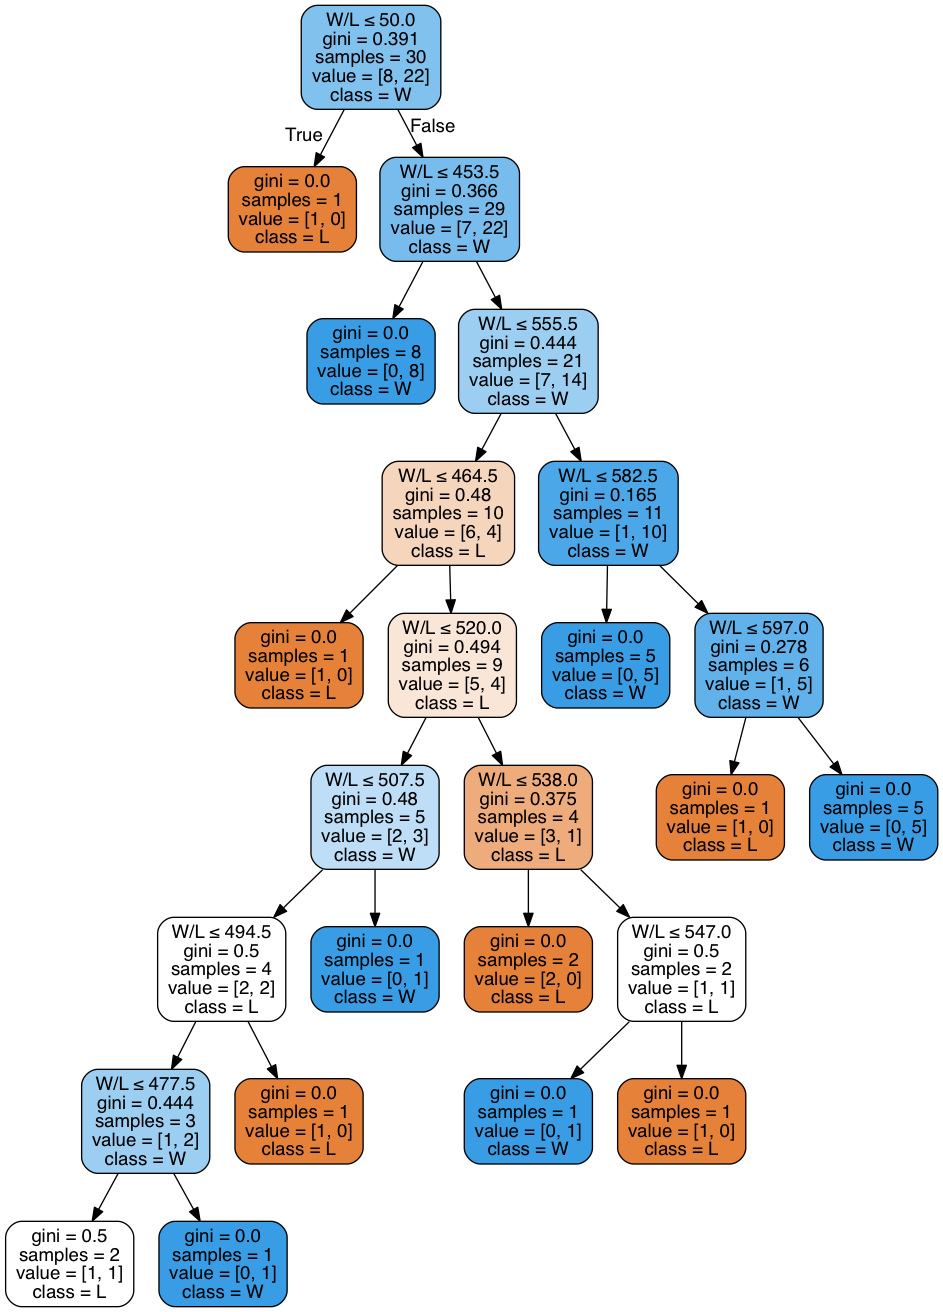

In [239]:
decisionTree = tree.DecisionTreeClassifier()

XTrain, XTest, yTrain, yTest = splitData(["trimp"])
# fit the tree with the traing data
decisionTree = decisionTree.fit(XTrain, yTrain)

# predict with the training data
y_pred_train = decisionTree.predict(XTrain)
# measure accuracy
print('Accuracy on training data = ', metrics.accuracy_score(y_true = yTrain, y_pred = y_pred_train))

# predict with the test data
y_pred = decisionTree.predict(XTest)
# measure accuracy
print('Accuracy on test data = ', metrics.accuracy_score(y_true = yTest, y_pred = y_pred))

renderTree(decisionTree, ["W/L"])